# Sales prediction using python

By using advertising dataset we build a model which predicts sales based on the money spent on different platforms while marketing.

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading dataset

In [2]:
s = pd.read_csv('advertising.csv')

In [3]:
s.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
s.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
s.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
s.shape

(200, 4)

In [8]:
s.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Visualisation of data

**scatterplot**

<Axes: xlabel='Newspaper', ylabel='Sales'>

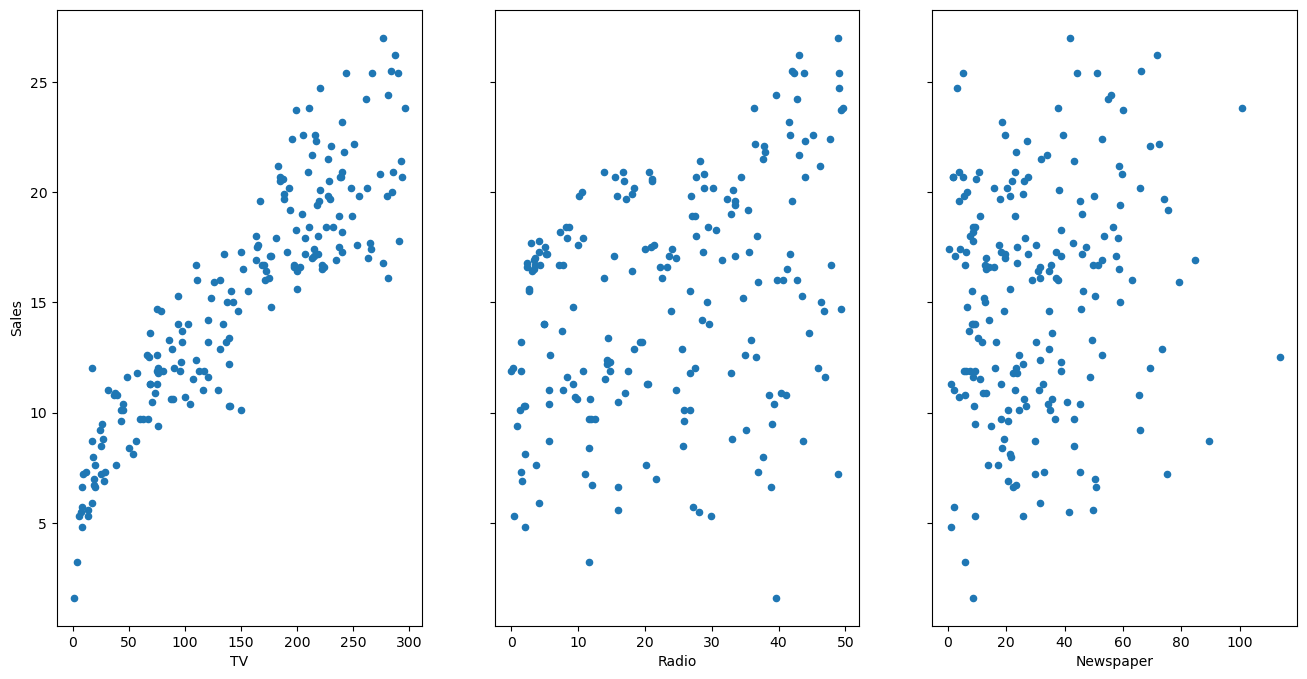

In [9]:
fig, axs = plt.subplots(1,3,sharey = True)
s.plot(kind='scatter',x='TV',y='Sales',ax = axs [0],figsize=(16,8))
s.plot(kind='scatter',x='Radio',y='Sales',ax = axs [1])
s.plot(kind='scatter',x='Newspaper',y='Sales',ax = axs [2])

**Histogram**

<Axes: ylabel='Frequency'>

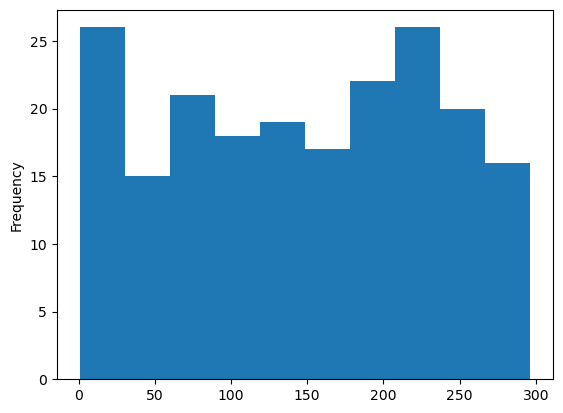

In [10]:
s['TV'].plot.hist()

<Axes: ylabel='Frequency'>

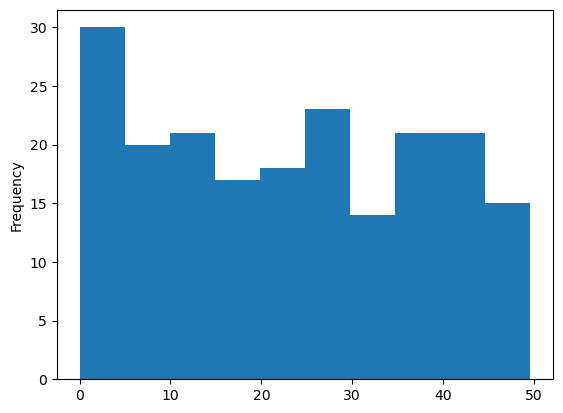

In [11]:
s['Radio'].plot.hist()

<Axes: ylabel='Frequency'>

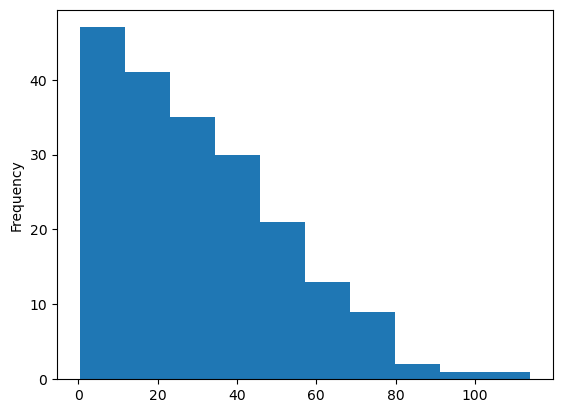

In [12]:
s['Newspaper'].plot.hist()

**Correlation matrix**

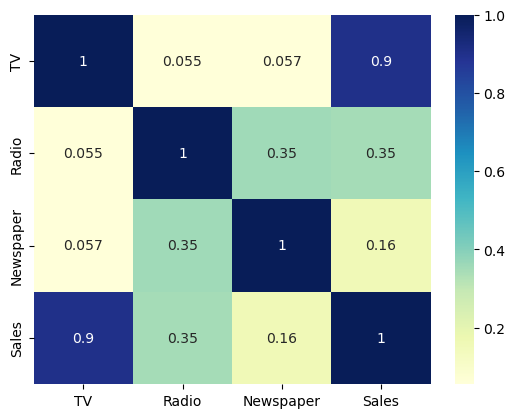

In [13]:
sns.heatmap(s.corr(),cmap='YlGnBu',annot=True)
plt.show()

We can clearly see that TV is more co-related to sales

# Train the model

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(s[['TV']],s[['Sales']],test_size=0.2,random_state=43)

In [15]:
print(x_train)

        TV
116  139.2
138   43.0
155    4.1
82    75.3
160  172.5
..     ...
58   210.8
21   237.4
49    66.9
64   131.1
68   237.4

[160 rows x 1 columns]


In [16]:
print(y_train)

     Sales
116   12.2
138    9.6
155    3.2
82    11.3
160   16.4
..     ...
58    23.8
21    17.5
49     9.7
64    16.0
68    18.9

[160 rows x 1 columns]


In [17]:
print(x_test)

        TV
56     7.3
37    74.7
67   139.3
79   116.0
80    76.4
188  286.0
183  287.6
10    66.1
128  220.3
62   239.3
65    69.0
17   281.4
133  219.8
195   38.2
146  240.1
38    43.1
173  168.4
149   44.7
93   250.9
29    70.6
0    230.1
2     17.2
122  224.0
180  156.6
95   163.3
121   18.8
185  205.0
39   228.0
66    31.5
19   147.3
11   214.7
45   175.1
41   177.0
92   217.7
168  215.4
1     44.5
57   136.2
189   18.7
151  121.0
167  206.8


In [18]:
print(y_test)

     Sales
56     5.5
37    14.7
67    13.4
79    11.0
80    11.8
188   20.9
183   26.2
10    12.6
128   24.7
62    20.7
65    11.3
17    24.4
133   19.6
195    7.6
146   18.2
38    10.1
173   16.7
149   10.1
93    22.2
29    10.5
0     22.1
2     12.0
122   16.6
180   15.5
95    16.9
121    7.0
185   22.6
39    21.5
66    11.0
19    14.6
11    17.4
45    16.1
41    17.1
92    19.4
168   17.1
1     10.4
57    13.2
189    6.7
151   11.6
167   17.2


# Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred = LR.predict(x_test)

In [21]:
#To calculate the performance of linear model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.851521143608274

In [22]:
LR.intercept_

array([6.93972863])

In [23]:
LR.coef_

array([[0.05516672]])

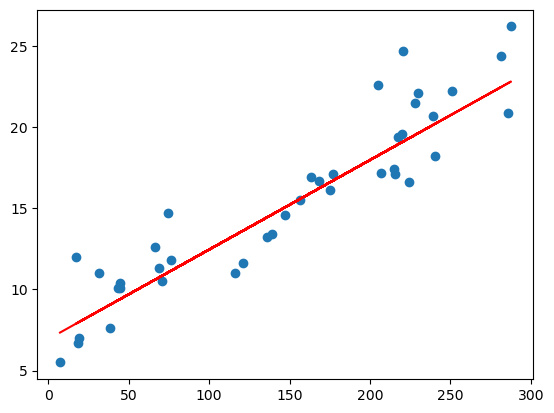

In [24]:
#plot shows TV and sales by advertisment 
plt.scatter(x_test,y_test)
plt.plot(x_test,6.93972863+0.05516672*x_test,'r')
plt.show()